In [1]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [2]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 620.6 kB/s eta 0:00:00


In [3]:
import csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("combined_dataset.csv")

In [6]:
df.head()

,Content,Tweet
0,string,"['paling', 'kampanye', 'milu']"
1,meta titlerue,"['halal', 'dukung', 'jelang', 'milu', 'butuh']"
2,ah palingan juga kampanye pemilu kak,"['sistem', 'milu', 'milu']"
3,aman orba hal seperti ini dulu dihalalkan dan ...,"['meja', 'milu', '2019', 'curang', 'rival', 'b..."
4,u yg tanya padahal sistem datang dari mana ada...,"['aja', 'bom', 'langgar']"


In [8]:
df['text'] = df['Tweet'].str.replace('\'', '')
df['text'] = df['text'].apply(lambda x: x.replace('[','').replace(']',''))
df['text'] = df['text'].str.replace(',', '')
df.head()

,Content,Tweet,text
0,string,"['paling', 'kampanye', 'milu']",paling kampanye milu
1,meta titlerue,"['halal', 'dukung', 'jelang', 'milu', 'butuh']",halal dukung jelang milu butuh
2,ah palingan juga kampanye pemilu kak,"['sistem', 'milu', 'milu']",sistem milu milu
3,aman orba hal seperti ini dulu dihalalkan dan ...,"['meja', 'milu', '2019', 'curang', 'rival', 'b...",meja milu 2019 curang rival berani 2 kotak mil...
4,u yg tanya padahal sistem datang dari mana ada...,"['aja', 'bom', 'langgar']",aja bom langgar


In [9]:
df.shape

(8236, 3)

# Proses Labelling

In [10]:
# Pembuatan Kamus Lexicon
lexicon_positive = {}
with open('positive.tsv', 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        if len(row) > 1 and row[1].lstrip('-').isdigit():
            lexicon_positive[row[0]] = int(row[1])

lexicon_negative = {}
with open('negative.tsv', 'r') as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t')
    for row in reader:
        if len(row) > 1 and row[1].lstrip('-').isdigit():
            lexicon_negative[row[0]] = int(row[1])

In [11]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    words = text.split()
    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score -= abs(lexicon_negative[word])  # Mengurangkan bobot negatif
    return score

In [12]:
df['compound'] = df['text'].apply(sentiment_analysis_lexicon_indonesia)

df['polarity'] = df['compound'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

print(df['polarity'].value_counts())

positive    4191
negative    2945
neutral     1100
Name: polarity, dtype: int64


In [13]:
df.head(20)

,Content,Tweet,text,compound,polarity
0,string,"['paling', 'kampanye', 'milu']",paling kampanye milu,3,positive
1,meta titlerue,"['halal', 'dukung', 'jelang', 'milu', 'butuh']",halal dukung jelang milu butuh,2,positive
2,ah palingan juga kampanye pemilu kak,"['sistem', 'milu', 'milu']",sistem milu milu,-4,negative
3,aman orba hal seperti ini dulu dihalalkan dan ...,"['meja', 'milu', '2019', 'curang', 'rival', 'b...",meja milu 2019 curang rival berani 2 kotak mil...,-24,negative
4,u yg tanya padahal sistem datang dari mana ada...,"['aja', 'bom', 'langgar']",aja bom langgar,1,positive
5,ebrak meja adeeehhh emilu yg dicurangi rivaln...,"['kasihan', 'hati', 'daftarin', 'milu', 'biar'...",kasihan hati daftarin milu biar hati dapet kur...,-5,negative
6,on ntpemilu aja belom mau pelanggaran di mana ...,"['calon', 'presiden', 'partai', 'nasdem', 'ani...",calon presiden partai nasdem anies baswedan te...,1,positive
7,asihan ya hatinya daftarin pemilu biar hatinya...,"['laku', 'konsolidasi', 'gerindra', 'kota', 'd...",laku konsolidasi gerindra kota depok menang pr...,1,positive
8,osialisasikan tika enyelenggaraan emilu dan ...,"['sosialisasi', 'etika', 'selenggara', 'milu',...",sosialisasi etika selenggara milu pwi dkpp tan...,3,positive
9,ak harus pemilu kan,['milu'],milu,0,neutral


In [14]:
df.to_csv("data_label.csv", index = False)

In [15]:
text = pd.read_csv("data_label.csv")

In [16]:
text.shape

(8236, 5)

In [17]:
text.head()

,Content,Tweet,text,compound,polarity
0,string,"['paling', 'kampanye', 'milu']",paling kampanye milu,3,positive
1,meta titlerue,"['halal', 'dukung', 'jelang', 'milu', 'butuh']",halal dukung jelang milu butuh,2,positive
2,ah palingan juga kampanye pemilu kak,"['sistem', 'milu', 'milu']",sistem milu milu,-4,negative
3,aman orba hal seperti ini dulu dihalalkan dan ...,"['meja', 'milu', '2019', 'curang', 'rival', 'b...",meja milu 2019 curang rival berani 2 kotak mil...,-24,negative
4,u yg tanya padahal sistem datang dari mana ada...,"['aja', 'bom', 'langgar']",aja bom langgar,1,positive


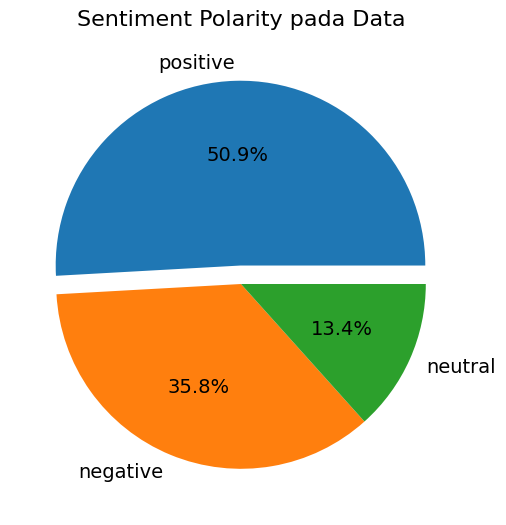

In [18]:
# Visualisasi

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in text['polarity'].value_counts()]
labels = list(text['polarity'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity pada Data', fontsize = 16, pad = 20)
plt.show()